In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt

In [2]:
tem     = xr.open_dataset('../CODIGOS/REDES/AL/DATA_DAY/2m_temperature.nc')-273.15
tem_dia = tem.t2m.mean(dim = ['longitude', 'latitude'])
dew     = xr.open_dataset('DATA_DAY/2m_dewpoint_temperature.nc')
dew_dia = dew.d2m.mean(dim = ['longitude', 'latitude'])
uwind   = xr.open_dataset('DATA_DAY/10m_u_component_of_wind.nc')
uwind_dia = uwind.u10.mean(dim = ['longitude', 'latitude'])
vwind   = xr.open_dataset('DATA_DAY/10m_v_component_of_wind.nc')
vwind_dia = vwind.v10.mean(dim = ['longitude', 'latitude'])
eva     = xr.open_dataset('DATA_DAY/evaporation.nc')*(-1000)
eva_dia = eva.e.mean(dim = ['longitude', 'latitude']) 
pre     = xr.open_dataset('DATA_DAY/total_precipitation.nc')*1000
pre_dia = pre.tp.mean(dim = ['longitude', 'latitude'])
leaf_high= xr.open_dataset('DATA_DAY/leaf_area_index_high_vegetation.nc')
leaf_high_dia = leaf_high.lai_hv.mean(dim = ['longitude', 'latitude']) 
leaf_low = xr.open_dataset('DATA_DAY/leaf_area_index_low_vegetation.nc')
leaf_low_dia = leaf_low.lai_lv.mean(dim = ['longitude', 'latitude']) 
skin    = xr.open_dataset('DATA_DAY/skin_reservoir_content.nc')
skin_dia = skin.src.mean(dim = ['longitude', 'latitude'])
soil_t = xr.open_dataset('DATA_DAY/soil_temperature_level_1.nc')-273.15
soil_t_dia = soil_t.stl1.mean(dim = ['longitude', 'latitude'])
rad     = xr.open_dataset('DATA_DAY/surface_solar_radiation_downwars.nc')/3600
rad_dia = rad.ssrd.mean(dim = ['longitude', 'latitude'])
vol     = xr.open_dataset('DATA_DAY/volumetric_soil_water_layer_1.nc') 
vol_dia = vol.swvl1.mean(dim = ['longitude', 'latitude'])

df_FWI = pd.read_csv("DATA_SEMILLERO/FWI.csv")
df_FWI =df_FWI.drop(columns=['Fecha', 'MES'])

# New test with RH

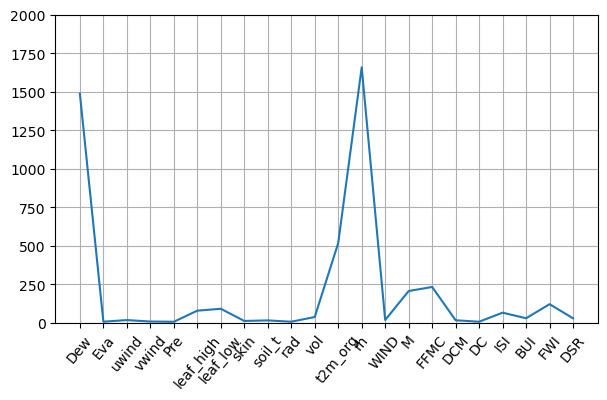

In [6]:
#df_FWI =df_FWI.drop(columns=['tp'])
X = pd.DataFrame(np.column_stack((dew_dia, eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia,leaf_low_dia, skin_dia, soil_t_dia, rad_dia,vol_dia,df_FWI)))   #Unir todos los DataFrame
X.columns = ['Dew','Eva','uwind','vwind','Pre','leaf_high','leaf_low','skin','soil_t','rad','vol','t2m_org', 'rh','WIND','M','FFMC','DCM','DC','ISI','BUI','FWI','DSR'] 
Y = pd.DataFrame(tem_dia)

V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)

V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (7,4))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,2000)
plt.grid()
plt.show()

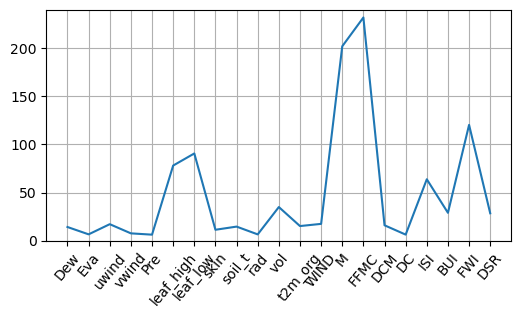

In [7]:
df_FWI =df_FWI.drop(columns=['rh'])
X = pd.DataFrame(np.column_stack((dew_dia, eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia,leaf_low_dia, skin_dia, soil_t_dia, rad_dia,vol_dia,df_FWI)))   #Unir todos los DataFrame
X.columns = ['Dew','Eva','uwind','vwind','Pre','leaf_high','leaf_low','skin','soil_t','rad','vol','t2m_org','WIND','M','FFMC','DCM','DC','ISI','BUI','FWI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,240)
plt.grid()
plt.show()

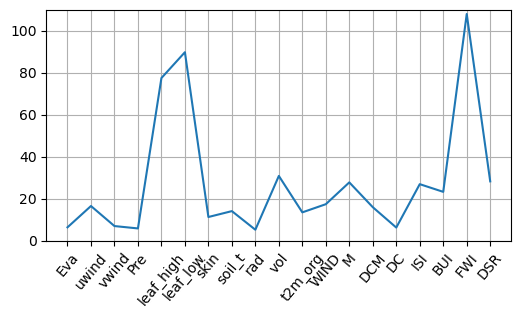

In [8]:
df_FWI2 =df_FWI.drop(columns=['FFMC'])
X = pd.DataFrame(np.column_stack((eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia,leaf_low_dia, skin_dia, soil_t_dia, rad_dia,vol_dia,df_FWI2)))   #Unir todos los DataFrame
X.columns = ['Eva','uwind','vwind','Pre','leaf_high','leaf_low','skin','soil_t','rad','vol','t2m_org','WIND','M','DCM','DC','ISI','BUI','FWI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,110)
plt.grid()
plt.show()

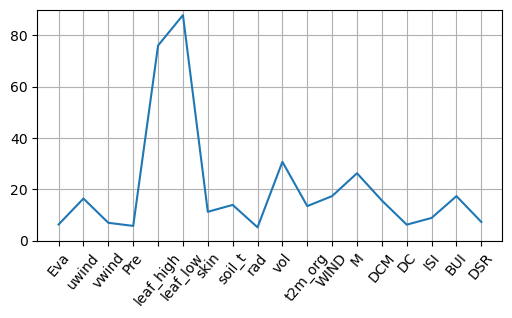

In [9]:
df_FWI3 =df_FWI2.drop(columns=['FWI'])
X = pd.DataFrame(np.column_stack((eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia,leaf_low_dia, skin_dia, soil_t_dia, rad_dia,vol_dia,df_FWI3)))   #Unir todos los DataFrame
X.columns = ['Eva','uwind','vwind','Pre','leaf_high','leaf_low','skin','soil_t','rad','vol','t2m_org','WIND','M','DCM','DC','ISI','BUI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,90)
plt.grid()
plt.show()

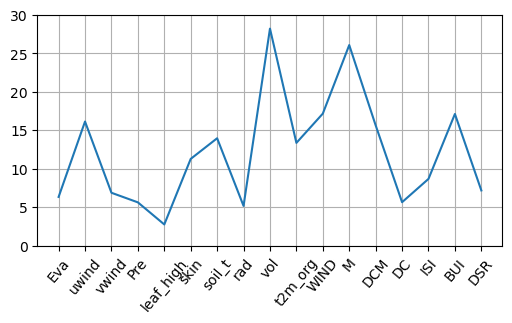

In [10]:
#sin leaf_low
X = pd.DataFrame(np.column_stack((eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,vol_dia,df_FWI3)))   #Unir todos los DataFrame
X.columns = ['Eva','uwind','vwind','Pre','leaf_high','skin','soil_t','rad','vol','t2m_org','WIND','M','DCM','DC','ISI','BUI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,30)
plt.grid()
plt.show()

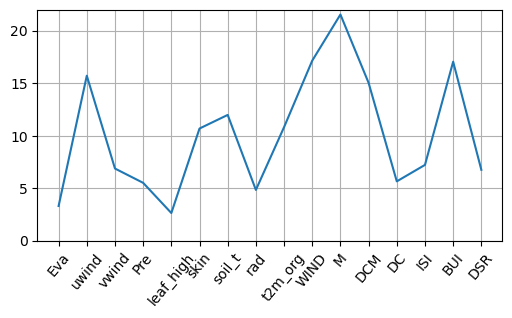

In [11]:
#sin vol
X = pd.DataFrame(np.column_stack((eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI3)))   #Unir todos los DataFrame
X.columns = ['Eva','uwind','vwind','Pre','leaf_high','skin','soil_t','rad','t2m_org','WIND','M','DCM','DC','ISI','BUI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,22)
plt.grid()
plt.show()

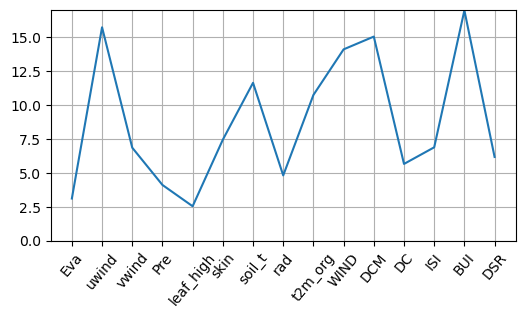

In [12]:
df_FWI4 =df_FWI3.drop(columns=['M'])
X = pd.DataFrame(np.column_stack((eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI4)))   #Unir todos los DataFrame
X.columns = ['Eva','uwind','vwind','Pre','leaf_high','skin','soil_t','rad','t2m_org','WIND','DCM','DC','ISI','BUI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,17)
plt.grid()
plt.show()

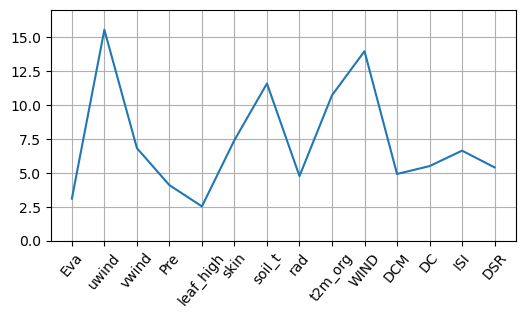

In [13]:
df_FWI5 =df_FWI4.drop(columns=['BUI'])
X = pd.DataFrame(np.column_stack((eva_dia,uwind_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI5)))   #Unir todos los DataFrame
X.columns = ['Eva','uwind','vwind','Pre','leaf_high','skin','soil_t','rad','t2m_org','WIND','DCM','DC','ISI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,17)
plt.grid()
plt.show()

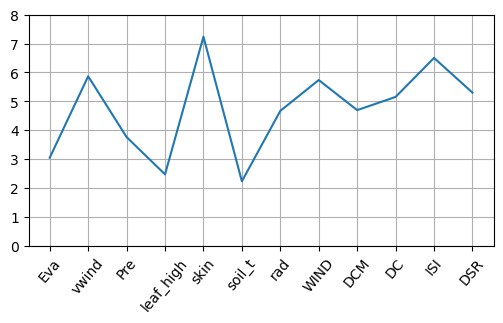

In [20]:
df_FWI6 =df_FWI5.drop(columns=['t2m_org'])
#sin u wind
X = pd.DataFrame(np.column_stack((eva_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI6)))   #Unir todos los DataFrame
X.columns = ['Eva','vwind','Pre','leaf_high','skin','soil_t','rad','WIND','DCM','DC','ISI','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,8)
plt.grid()
plt.show()

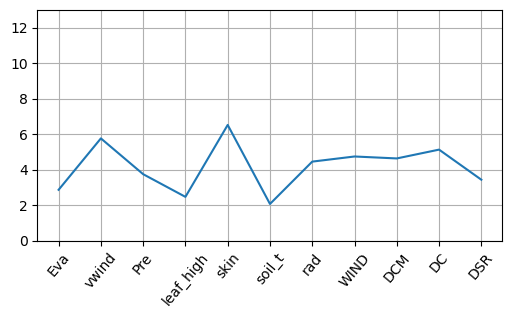

In [21]:
df_FWI7 =df_FWI6.drop(columns=['ISI'])
X = pd.DataFrame(np.column_stack((eva_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI7)))   #Unir todos los DataFrame
X.columns = ['Eva','vwind','Pre','leaf_high','skin','soil_t','rad','WIND','DCM','DC','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,13)
plt.grid()
plt.show()

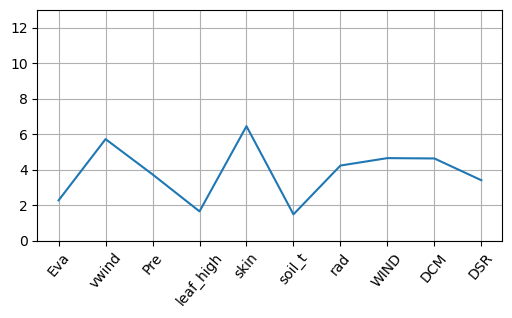

In [22]:
df_FWI8 =df_FWI7.drop(columns=['DC'])
X = pd.DataFrame(np.column_stack((eva_dia,vwind_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI8)))   #Unir todos los DataFrame
X.columns = ['Eva','vwind','Pre','leaf_high','skin','soil_t','rad','WIND','DCM','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,13)
plt.grid()
plt.show()

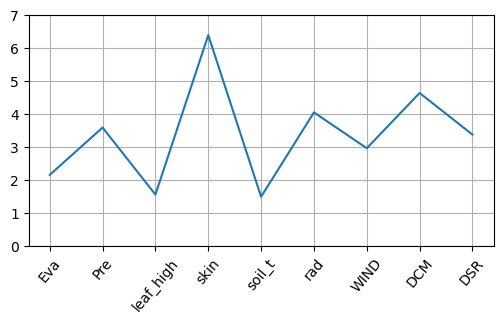

In [24]:
#Remove vwind
X = pd.DataFrame(np.column_stack((eva_dia,pre_dia,leaf_high_dia, skin_dia, soil_t_dia, rad_dia,df_FWI8)))   #Unir todos los DataFrame
X.columns = ['Eva','Pre','leaf_high','skin','soil_t','rad','WIND','DCM','DSR'] 
Y = pd.DataFrame(tem_dia)
V = add_constant(X)
vif = pd.Series([variance_inflation_factor(V.values, i) for i in range(V.shape[1])], index=V.columns)
plt.figure(figsize = (6,3))
plt.plot(vif[1:])
plt.xticks(rotation = 50)
plt.ylim(0,7)
plt.grid()
plt.show()